# SUOD - Scalable Unsupervised Outlier Detection
### SUOD is an acceleration framework for large scale unsupervised outlier detector training and prediction
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.suod

### Arguments that work with SUOD algorithm:
1. base_estimators
2. contamination
3. combination
4. n_jobs
5. rp_clf_list
6. rp_ng_clf_list
7. rp_flag_global
8. target_dim_frac
9. jl_method
10. bps_flag
11. approx_clf_list
12. approx_ng_clf_list
13. approx_flag_global
14. approx_clf
15. cost_forecast_loc_fit
16. cost_forecast_loc_pred
17. verbose

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=7, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   257.526104 seconds
image downsampling       ...took     4.892148 seconds
image downsampling       ...took    12.368248 seconds
image downsampling       ...took    19.841139 seconds
image downsampling       ...took    23.137462 seconds
image downsampling       ...took    26.517939 seconds
image downsampling       ...took    34.088836 seconds
image downsampling       ...took    37.400480 seconds
image downsampling       ...took    40.727356 seconds
image downsampling       ...took    44.029598 seconds
image downsampling       ...took    47.381038 seconds
image downsampling       ...took    54.840883 seconds
image downsampling       ...took    74.438311 seconds
image downsampling       ...took    84.305511 seconds
image downsampling       ...took    87.630004 seconds
image downsampling       ...took    90.915071 seconds
image downsampling       ...took    98.616756 seconds
image downsampling       ...took   101.925892 seconds
image downsampling       ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.0s finished


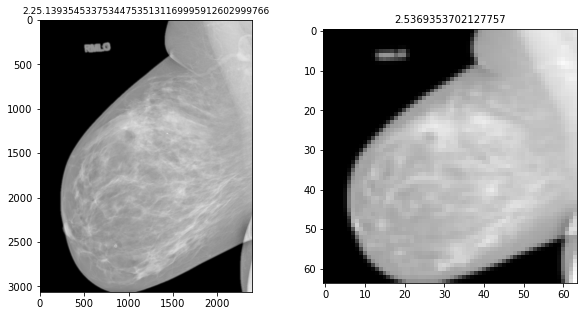

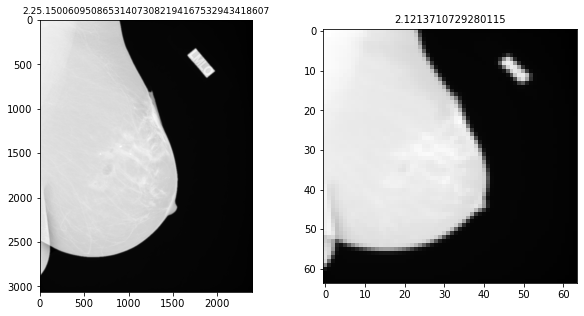

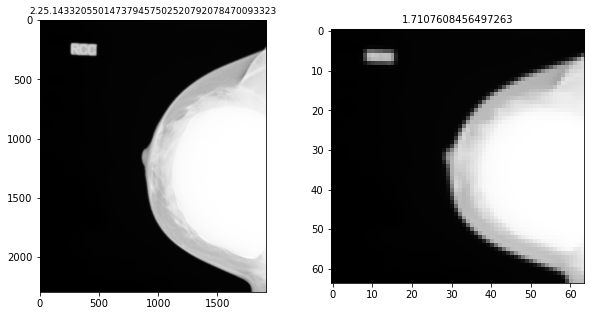

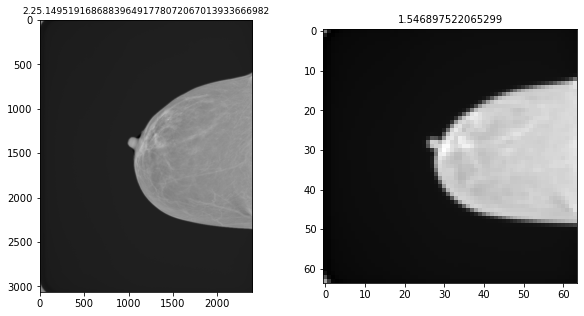

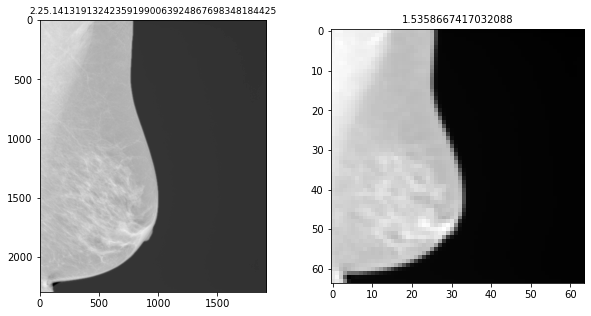

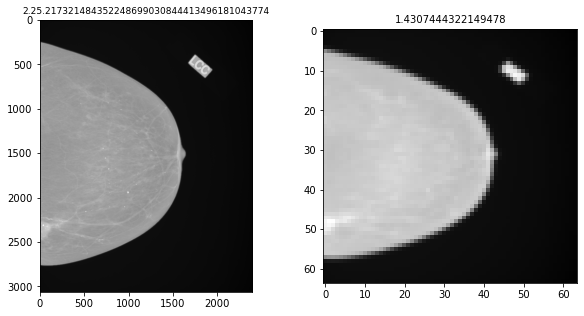

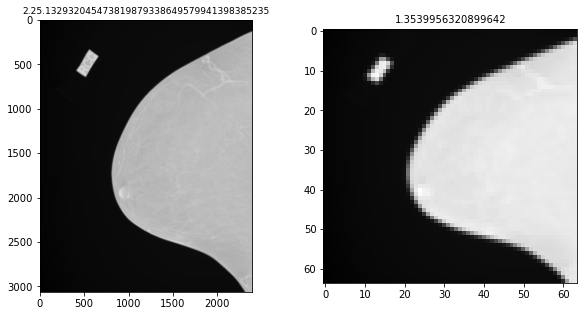

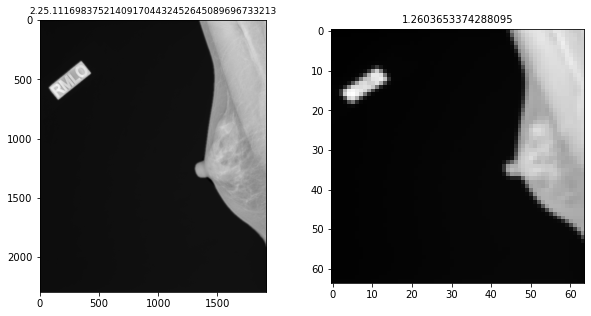

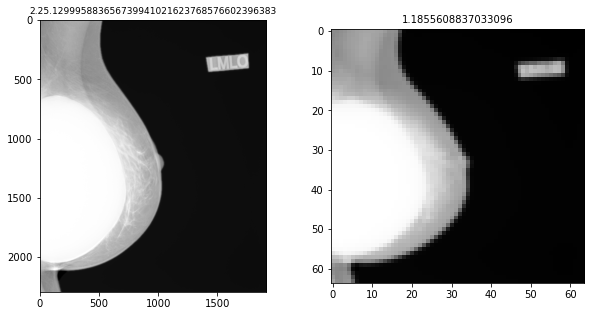

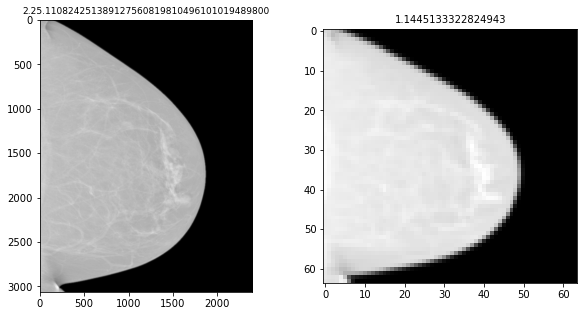

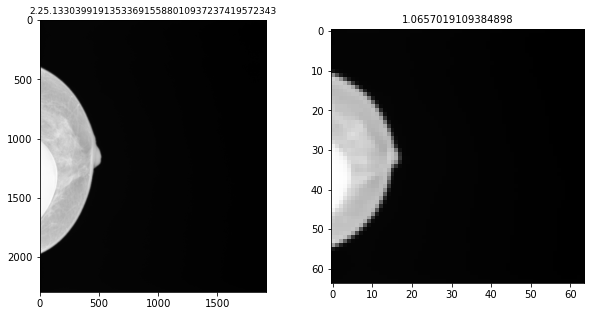

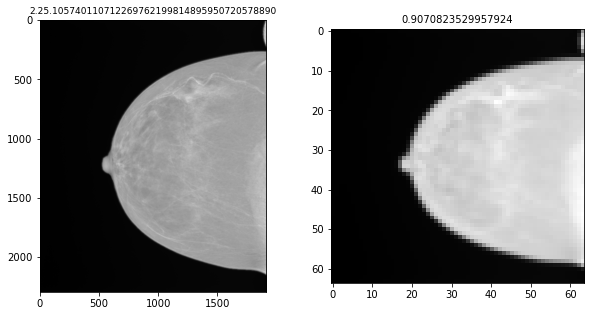

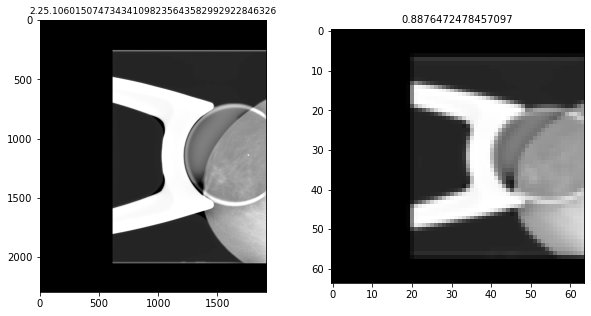

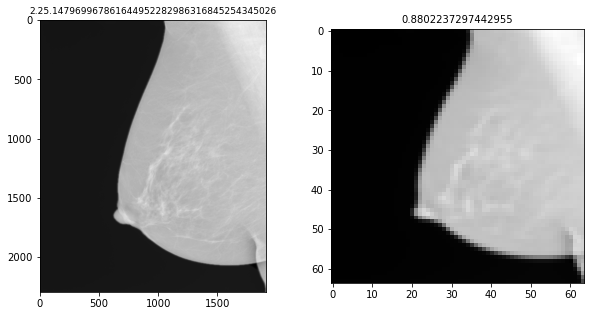

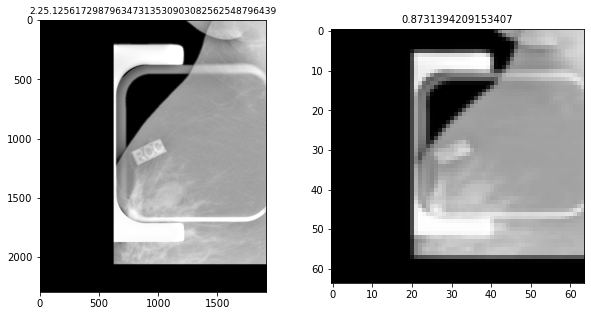

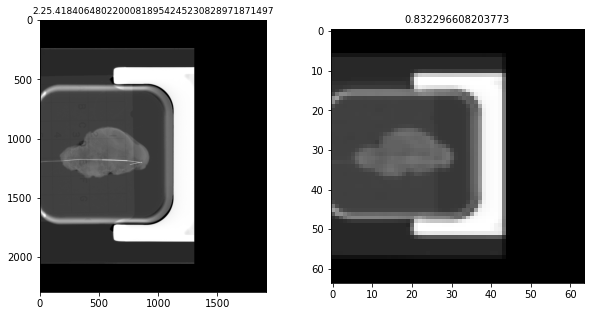

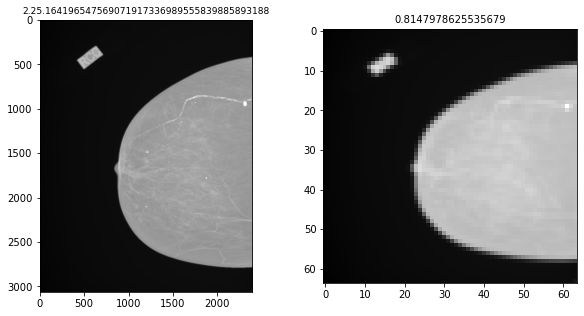

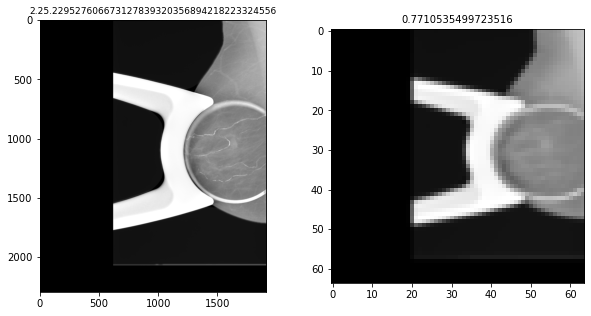

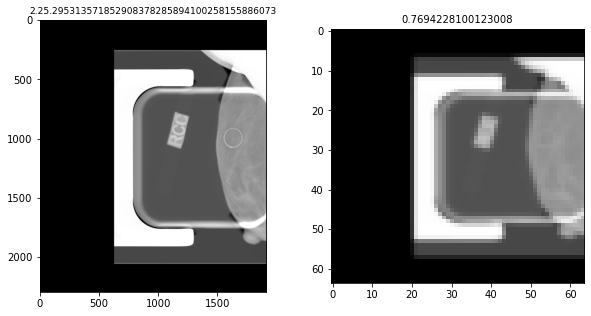

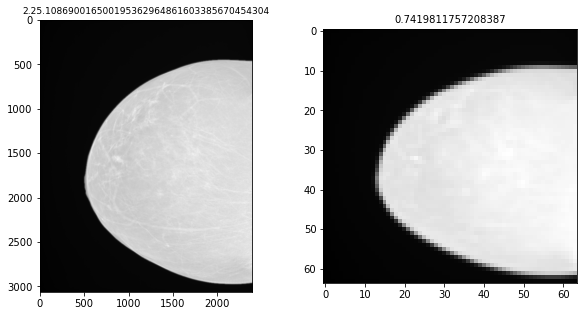

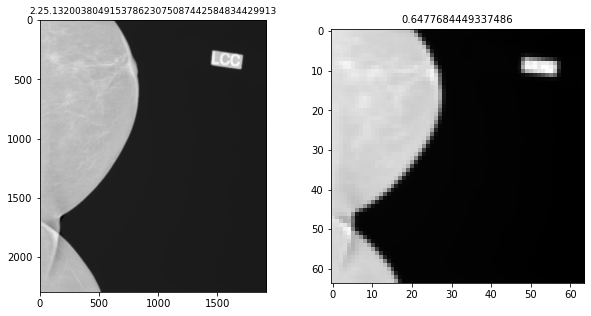

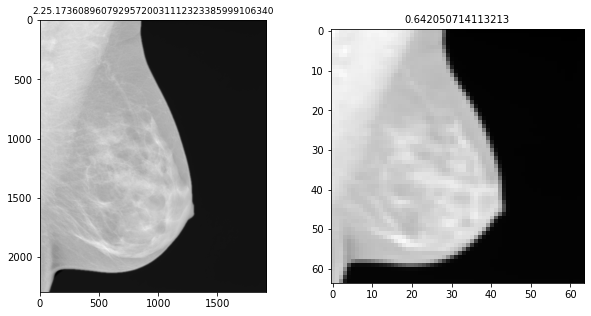

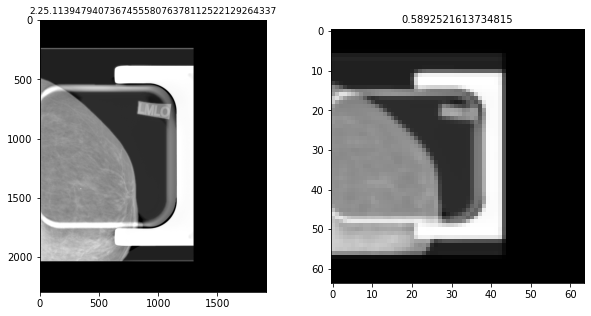

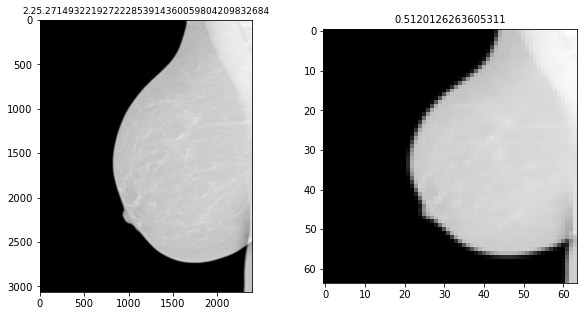

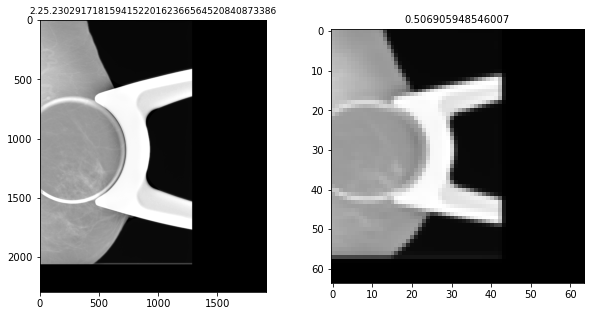

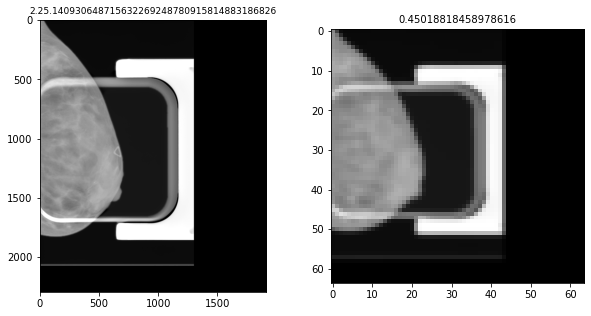

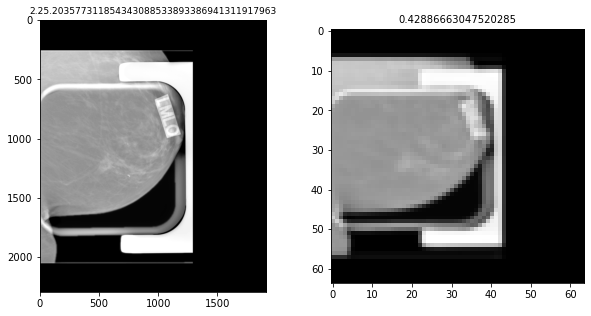

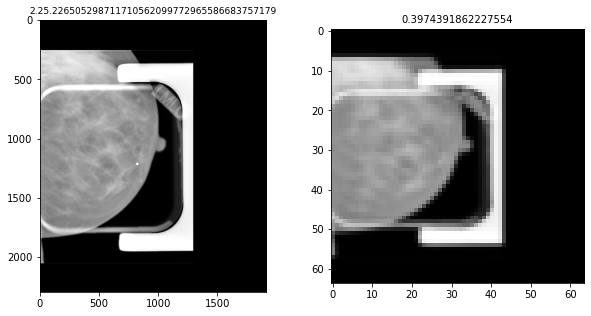

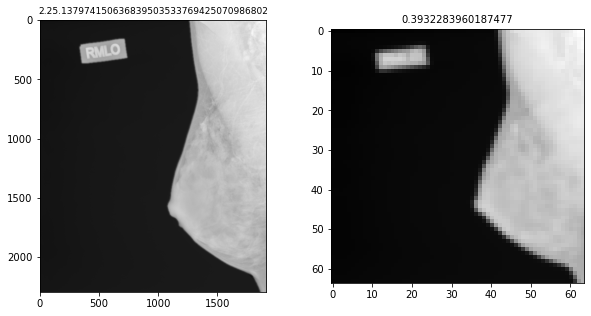

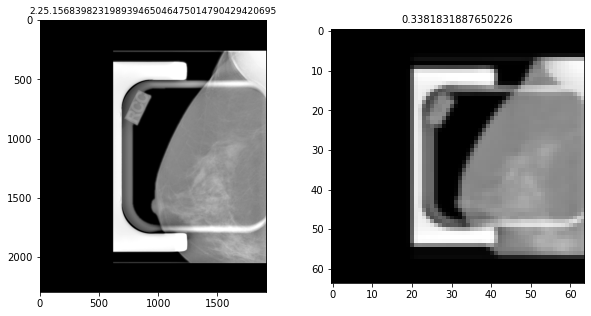

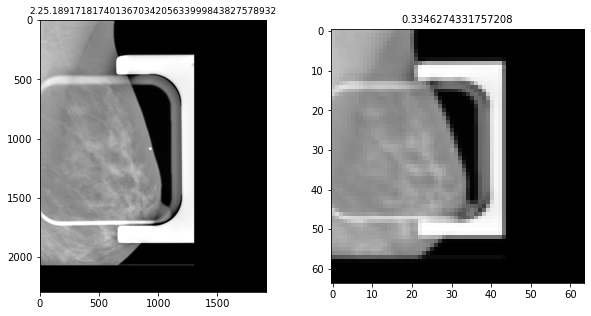

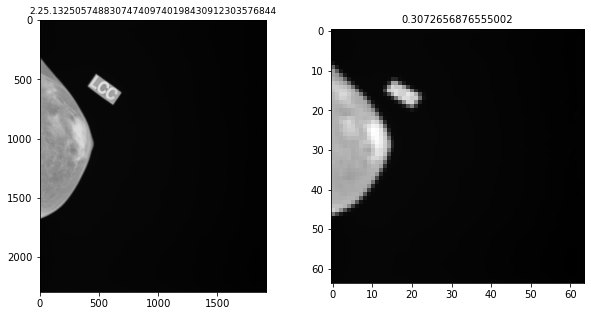

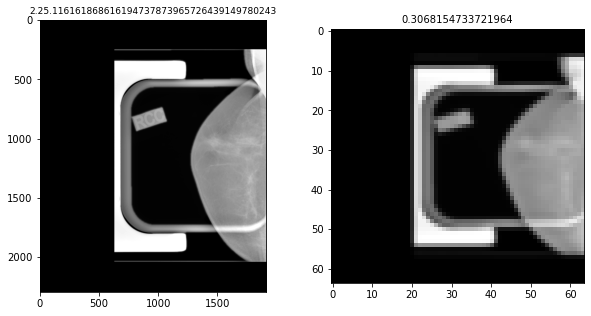

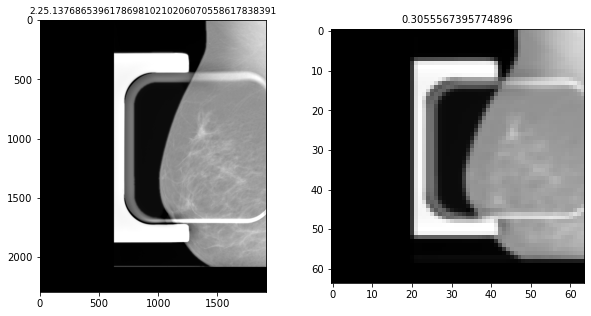

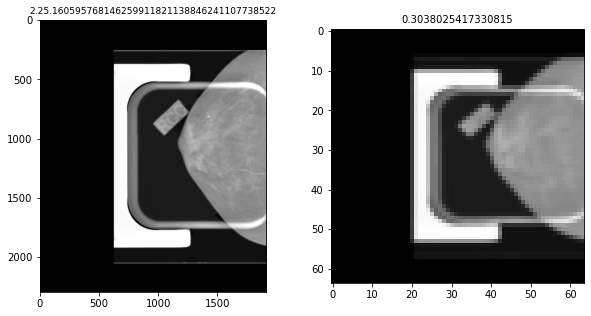

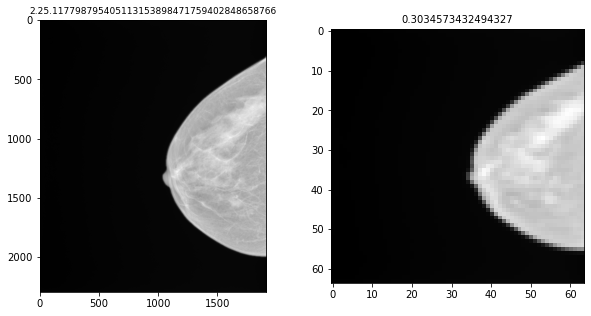

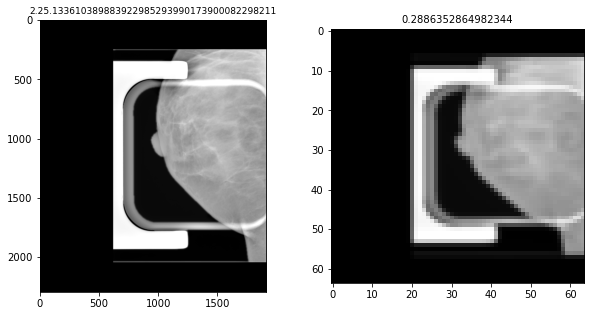

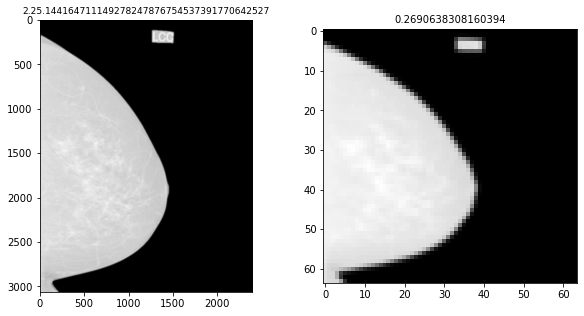

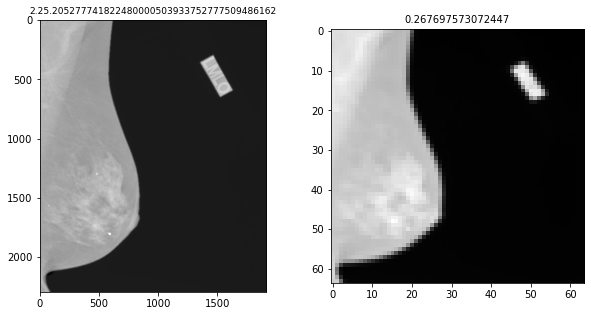

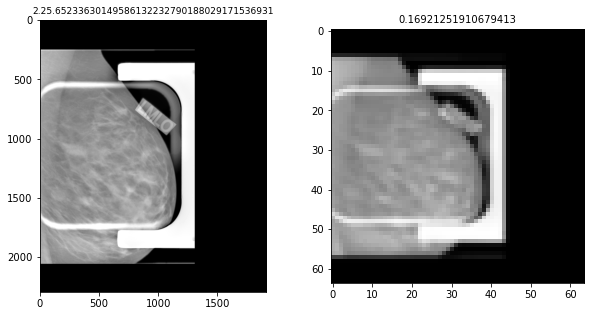

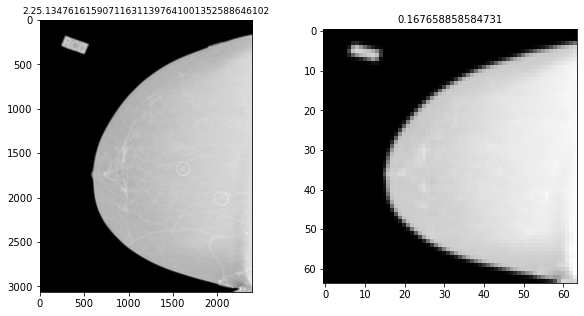

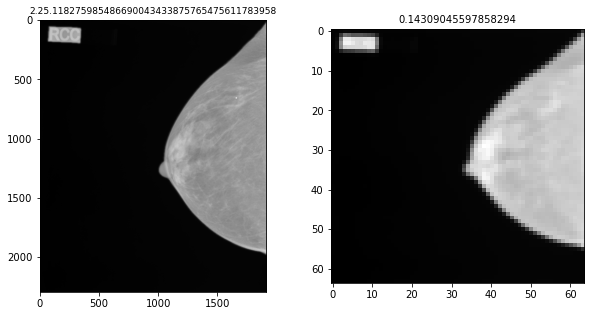

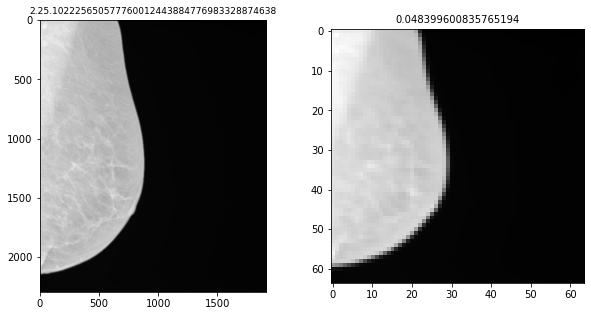

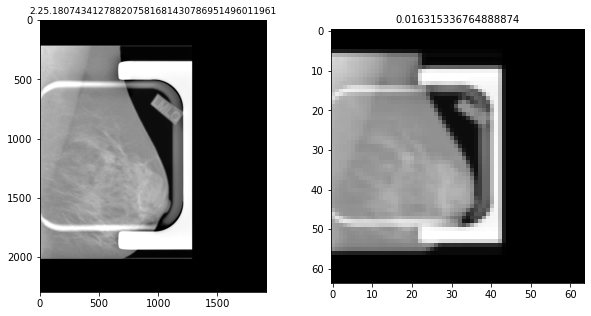

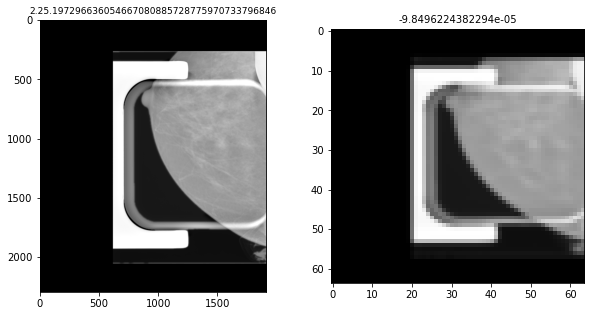

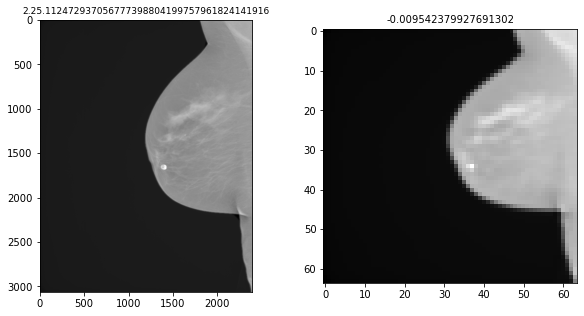

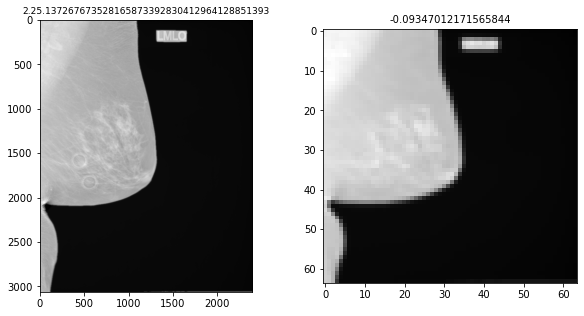

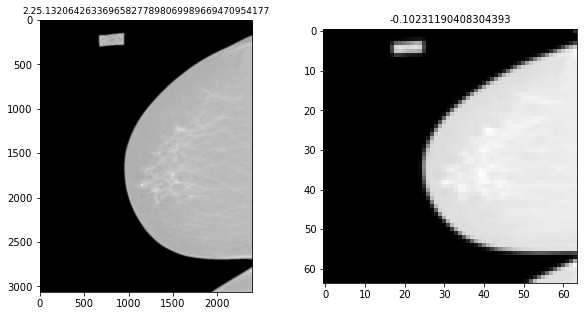

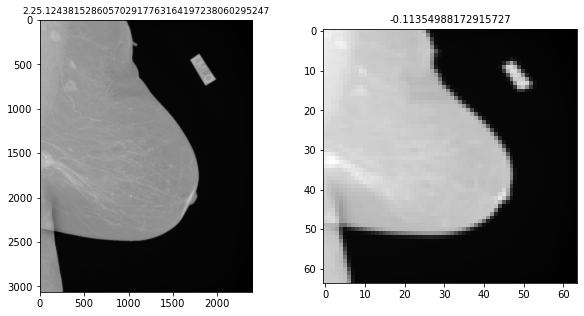

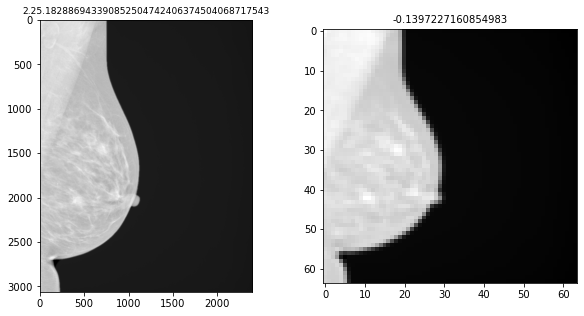

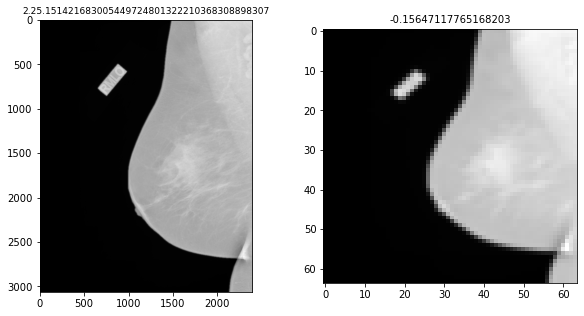

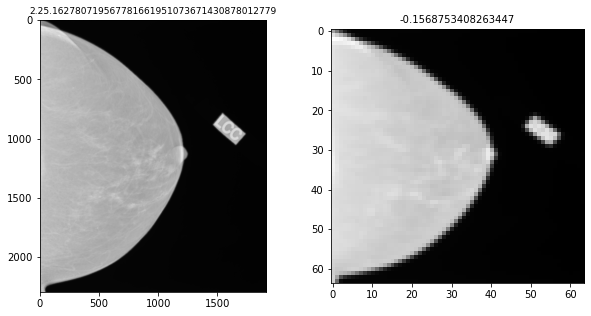

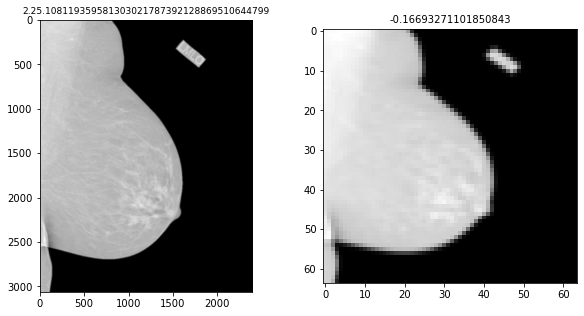

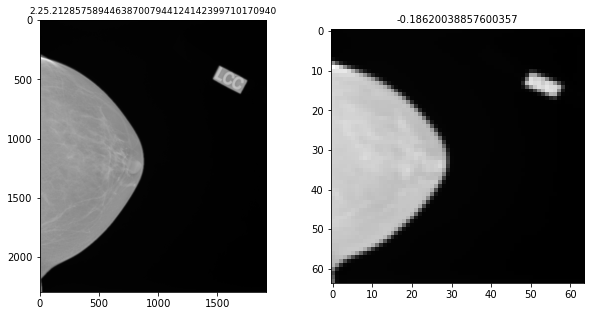

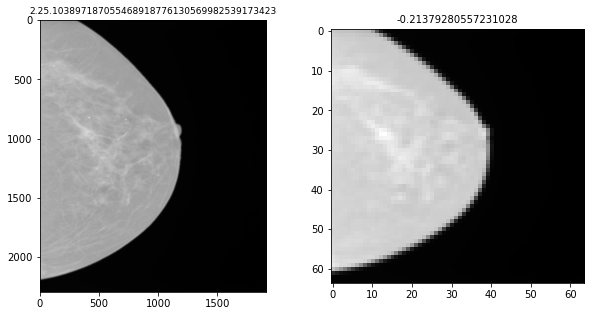

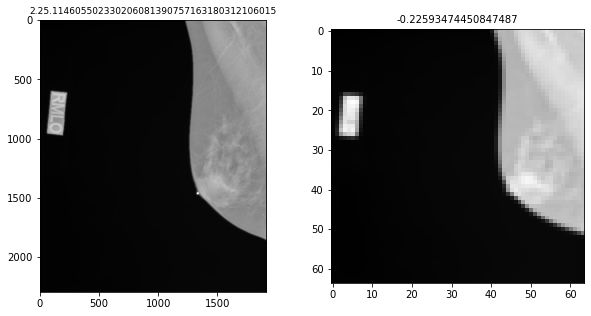

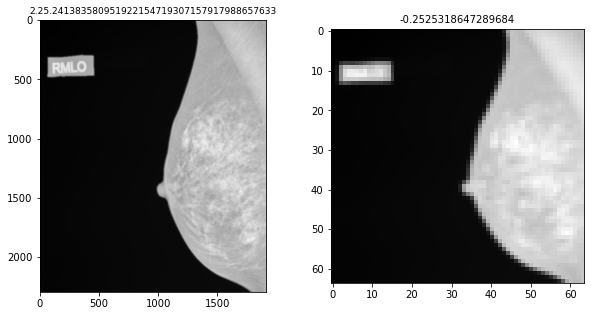

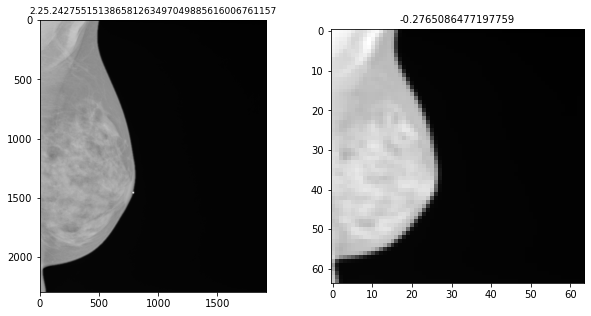

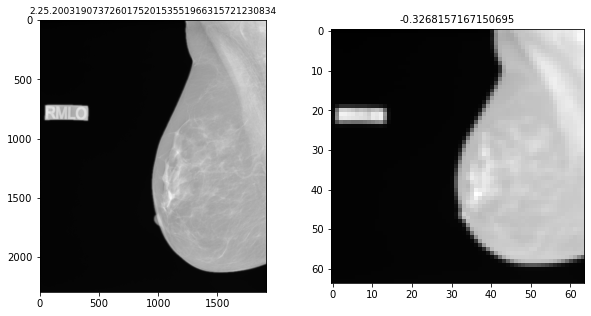

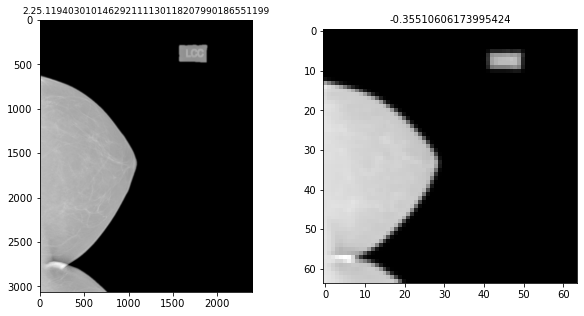

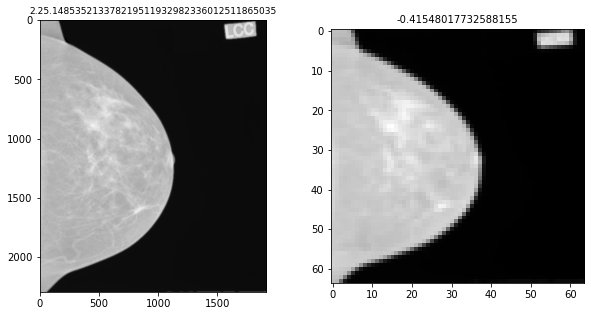

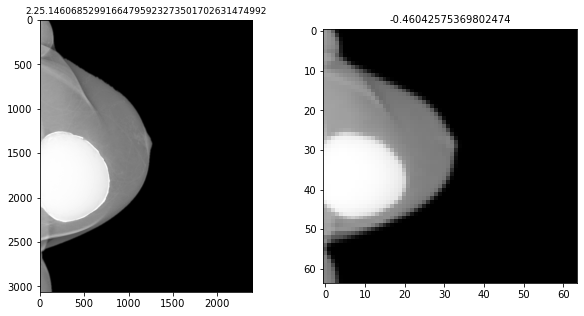

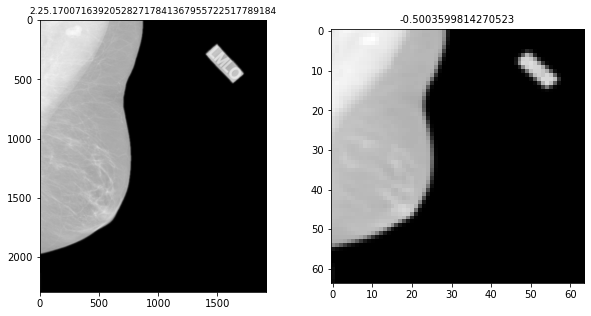

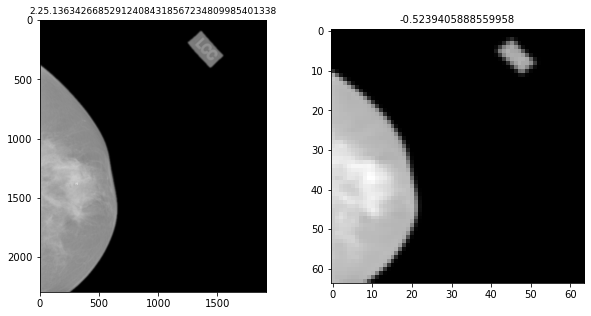

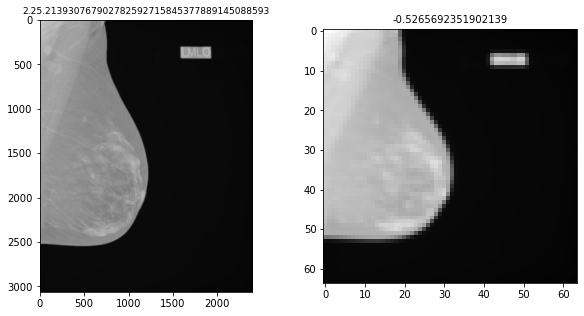

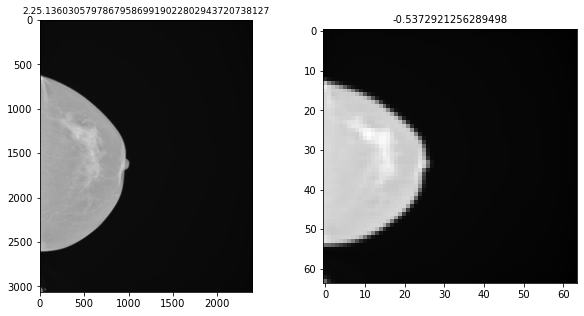

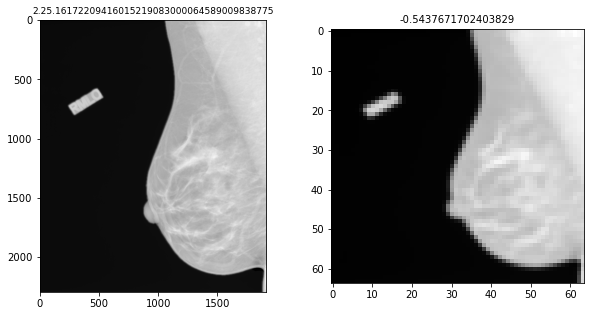

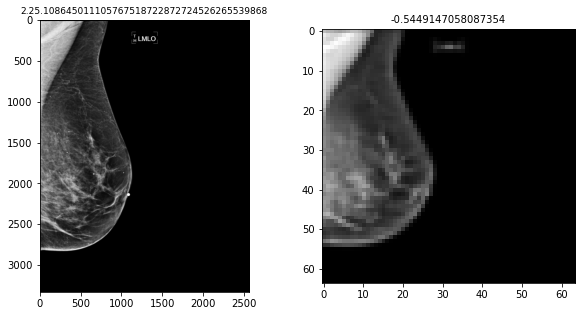

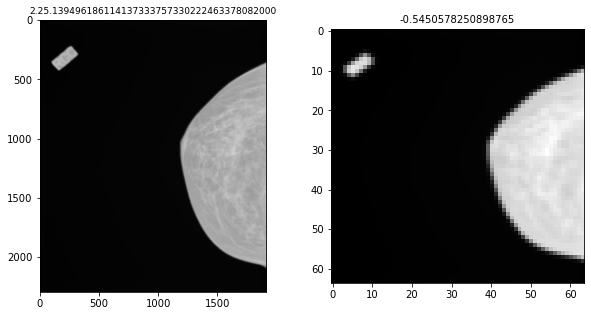

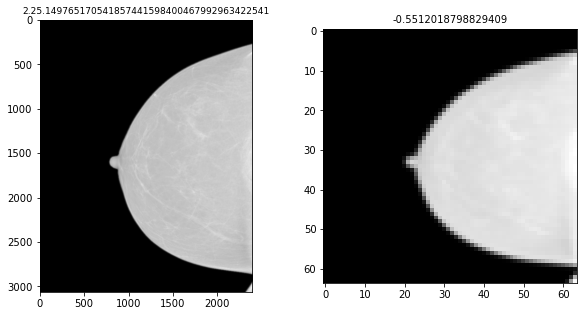

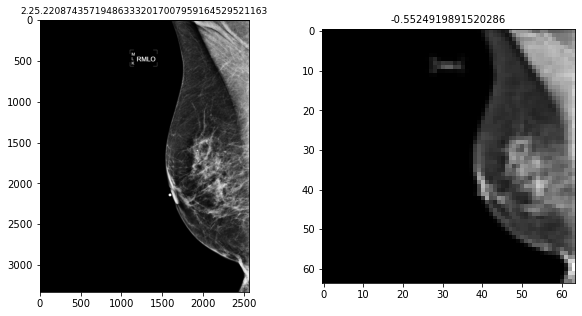

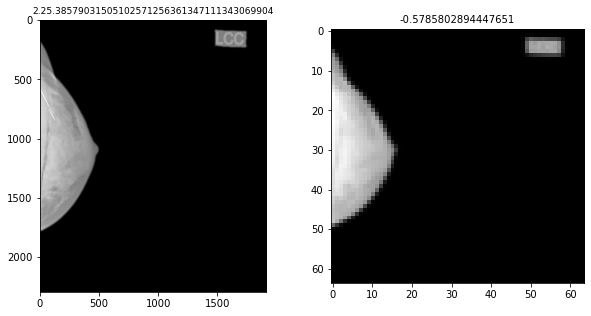

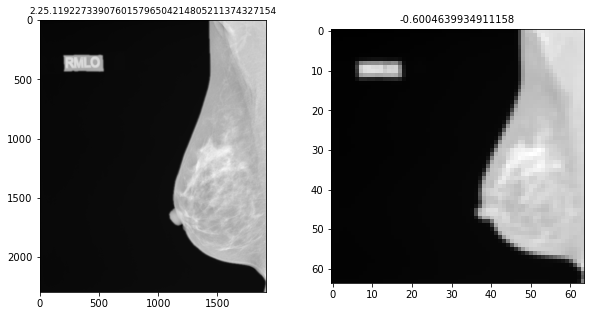

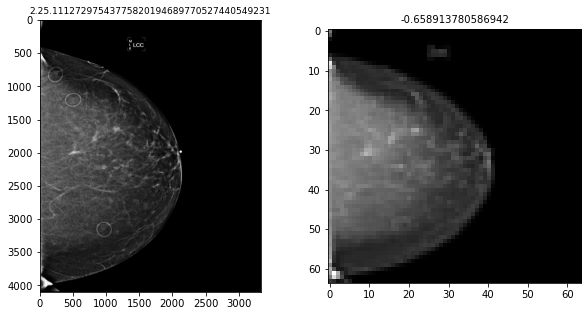

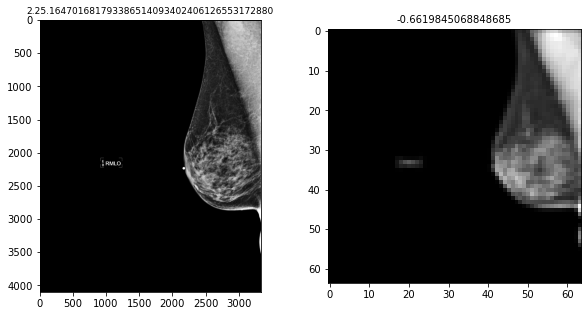

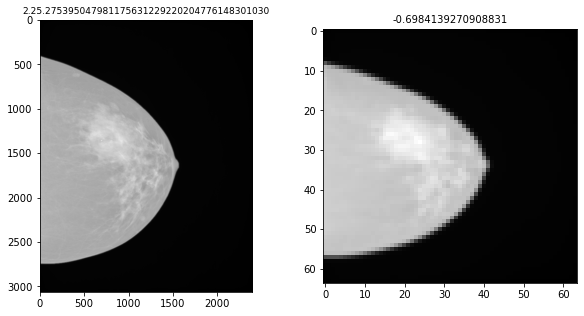

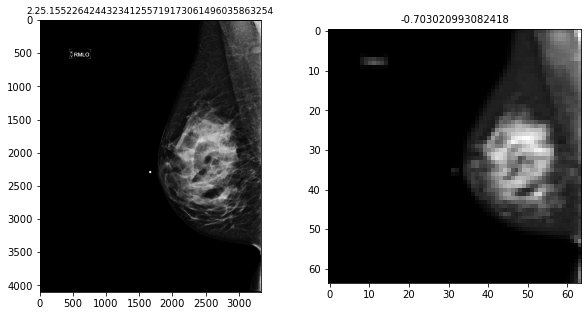

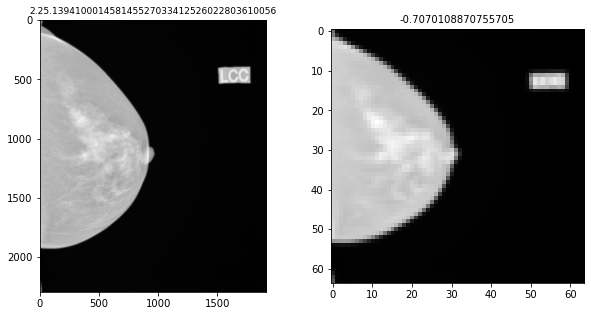

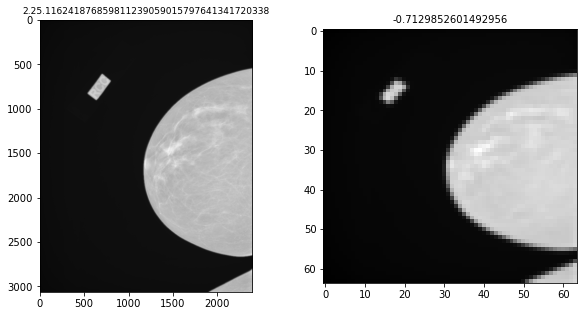

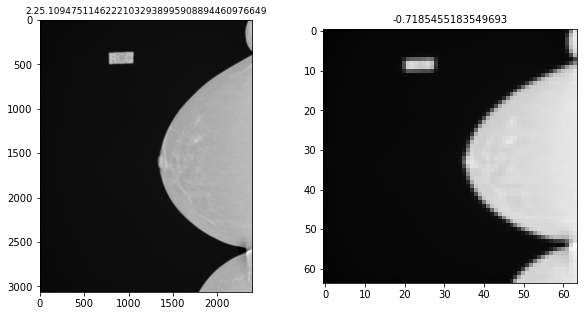

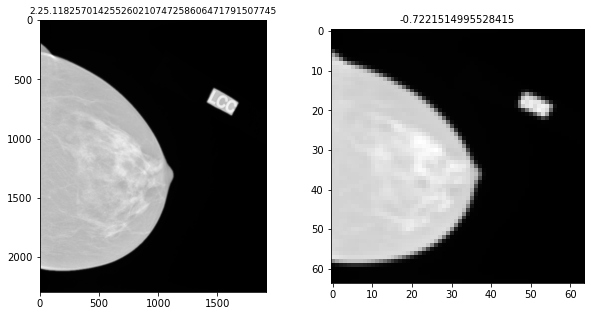

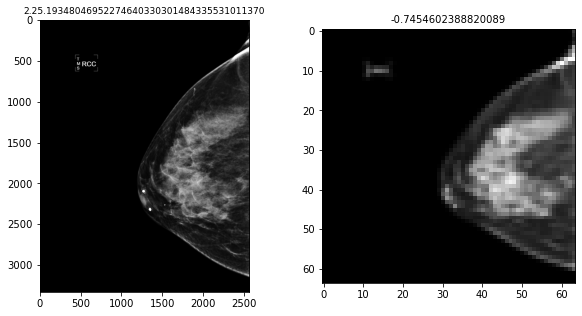

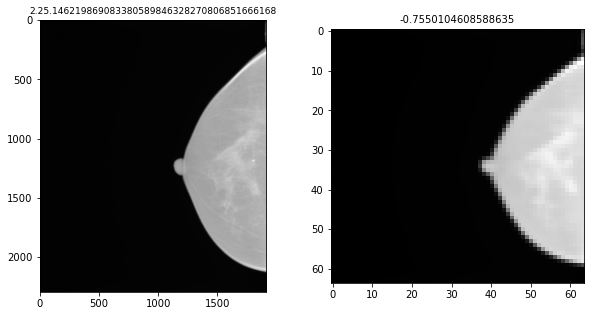

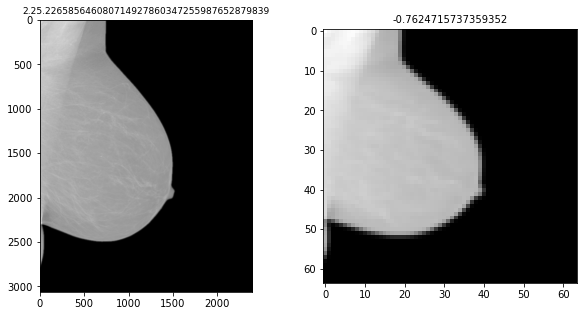

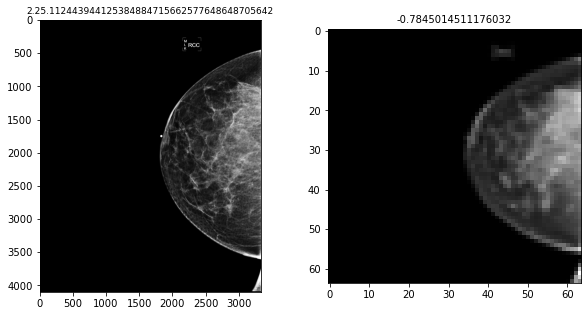

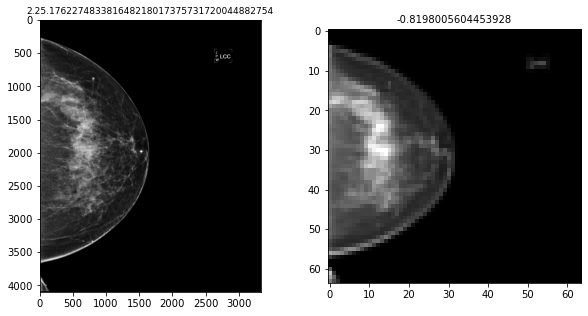

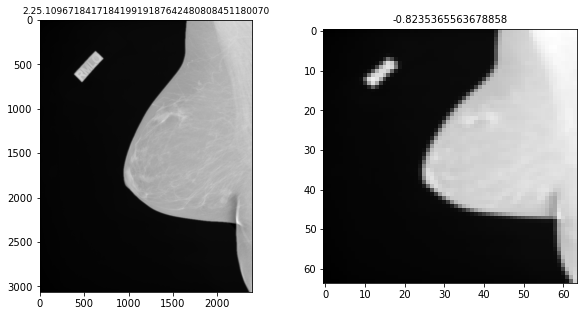

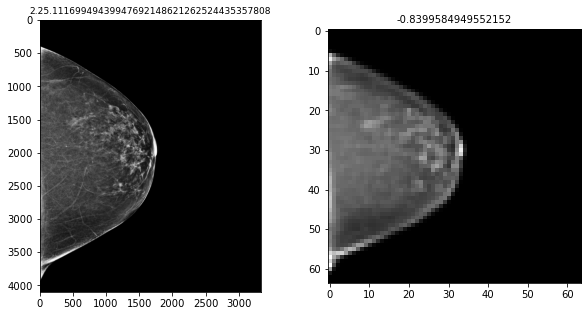

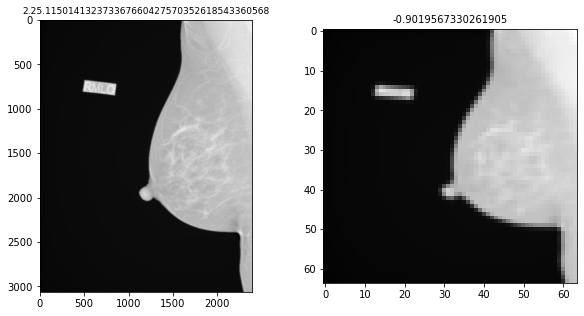

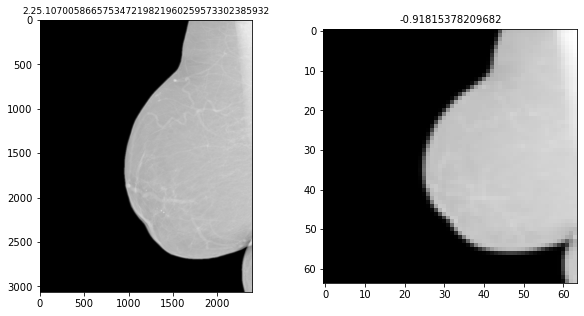

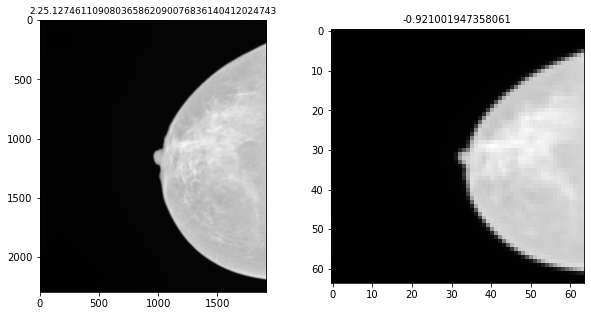

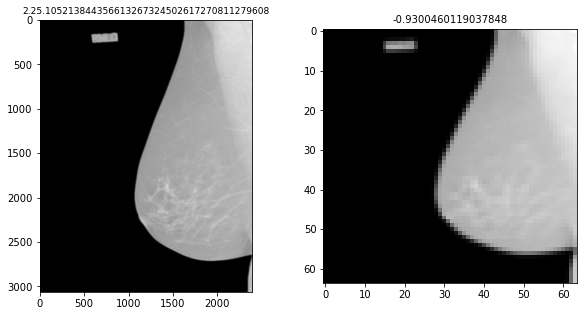

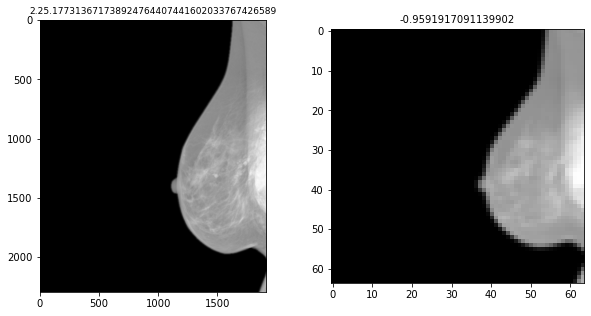

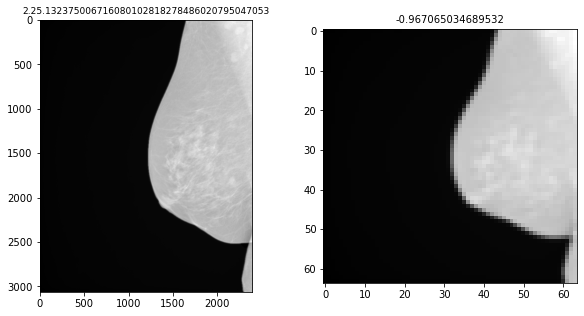

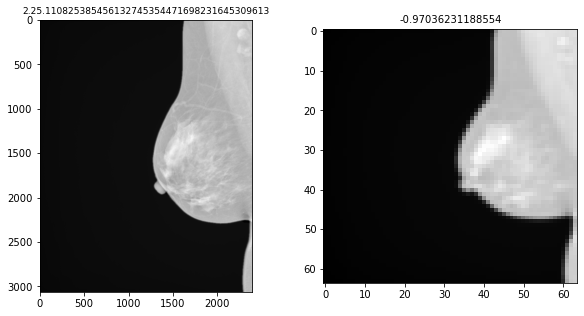

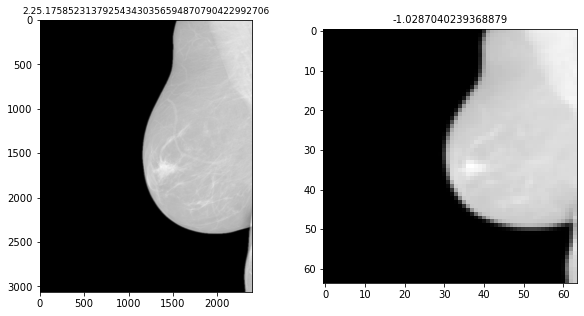

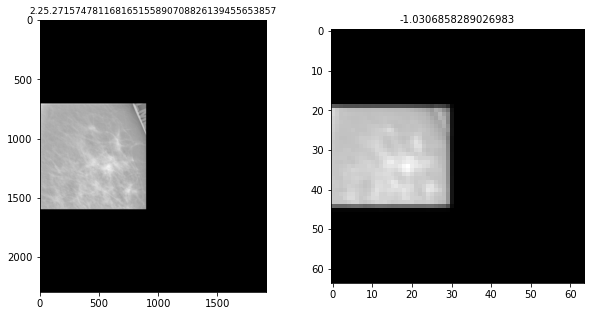

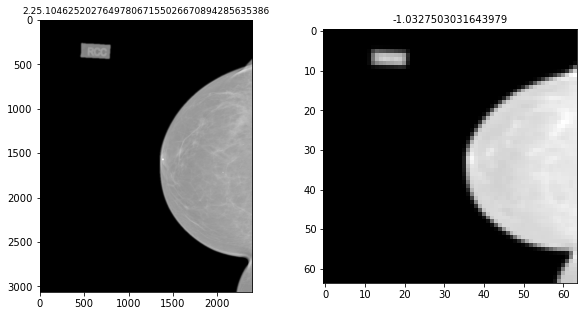

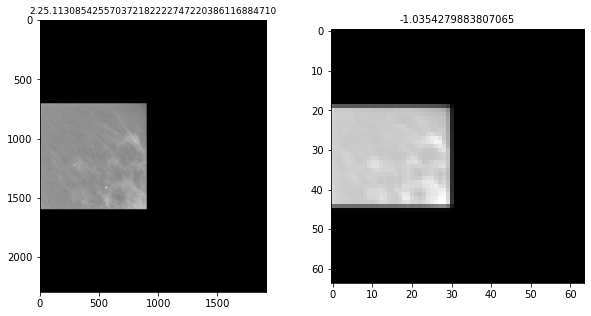

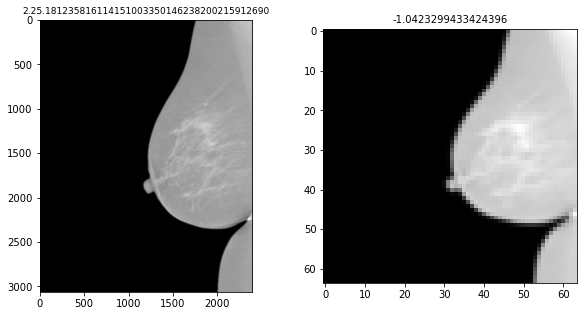

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='SUOD')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])

In [ ]:
# initialized a group of outlier detectors for acceleration
# detector_list = [LOF(n_neighbors=15), LOF(n_neighbors=20),
#                  LOF(n_neighbors=25), LOF(n_neighbors=35),
#                  COPOD(), IForest(n_estimators=100),
#                  IForest(n_estimators=200)]

# # decide the number of parallel process, and the combination method
# # then clf can be used as any outlier detection model
# clf = SUOD(base_estimators=detector_list, n_jobs=2, combination='average',
#            verbose=False)